# 프로젝트: 고양이 수염 스티커 만들기

## 1. 사진 파일 준비

![수염사진 다운로드 완료](https://8888-wl7l2o9w7m38ln4wcypyifowl.e.prod.connect.ainize.ai/view/aiffel/camera_sticker/images/cat-whiskers.png)

### 1-2. 내사진 : 2015년 나홀로 영국 출장사진

![내사진_영국](https://8888-wl7l2o9w7m38ln4wcypyifowl.e.prod.connect.ainize.ai/view/aiffel/camera_sticker/images/image.png)

### 1-3 사진 준비

#### 1) 라이브러리 

In [124]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("라이브러리 준비완료")

라이브러리 준비완료


#### 2) 이미지 읽어드림

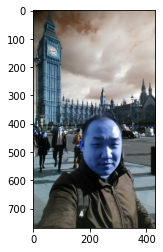

In [125]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()   
plt.imshow(img_bgr)
plt.show()

##### ① img_bgr = cv2.imread(my_image_path)
⇒ openCV는 BGR이라 Red가 blue로 변환된다.

#### 3) 이미지 조정

##### ① img_show = img_bgr.copy()  
⇒ 출력용 이미지 파일을 따로 저장한다. 원본은 백업되게~

##### ② RGB로 이미지를 바꾸자

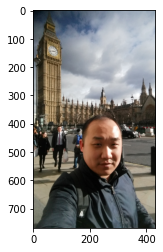

In [126]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

***

## 2.얼굴 검출 & 랜드마크 검출 하기
###오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.

In [127]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("라이브러리 준비완료")

라이브러리 준비완료


### 2-1 배경
1) dlib의 face detector는 HOG(Histogram of Oriented Gradients)와 SVM(Support Vector Machine) 이용.  
HOG란 색상의 변화량을 나타냄  

2) HOG를 통해 벡터로 변환된 데이터를 SVM을 이용하여 구분을 해줌  
SVM이란 선형 분류기

### 2-2 실행

#### hog detector 선언 후 bounding box 추출

In [128]:
detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸
🌫🛸


#### 출력해보자

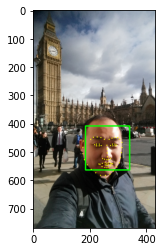

In [129]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
                # left(), top(), right(), bottom(), height(), width()등

# img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# ↑↑↑↑↑↑↑↑↑↑필요없는 typing

plt.imshow(img_show_rgb)
plt.show()

### 2-3 Face landmark  
detection 의 결과물인 bounding box 로 잘라낸(crop) 얼굴 이미지를 이용    

object keypoint estimation  
    ① top-down: box 내부의 keypoint 예측  
    ② bottom-up: 이미지 전체 keypoint찾고 그들간의 관계를 이용해 군집화한 후 box 생성

#### Top-down 방식으로 keypoint estimation 적용

Dlib의 제공되는 모델을 사용하기 위해 weight file을 다운로드 했다.
솔직히 이해를 못했다.

In [130]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("Landmark 불러들였음")

Landmark 불러들였음


In [131]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


 list_points : "tuple(x,y)"이 68개인 list  
 이미지에 list_;points를 삽입

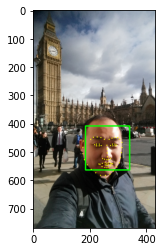

In [132]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

# img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

내얼굴에 landmark한 box를 확인할 수가 있다.

---

# 4. 스티커 적용하기
(1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.

(2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 cv2.addWeighted() 를 참고하세요.

## 4-1 내사진 위치 잡기

In [133]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) 
    x = landmark[30][0]
    y = landmark[30][1] + dlib_rect.height()
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(261, 517)
(x,y) : (261,673)
(w,h) : (156,156)


---  

스티커 위치: (x,y)= x[코], y[z코좌표-높이절반]  
코의 index = 30  
스티커의 크기 : width = height = width_bbox  
---   
내코위치 : (261,517)

## 4-2 수염 확인

In [134]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)


(156, 156, 3)


---   
수염 이미지 읽음

In [141]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (183,517)


스티커가 이미지 범위밖이 아니라 특별히 할 필요가 없다.

In [142]:
#if refined_x < 0: 
#    img_sticker = img_sticker[:, -refined_x:]
#    refined_x = 0
#if refined_y < 0:
#    img_sticker = img_sticker[-refined_y:, :]
#    refined_y = 0
#
# print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

## 4-3 수염 적용

In [143]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


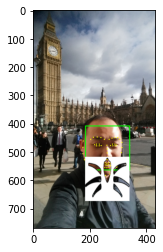

In [138]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

##### landbox를 제거하자

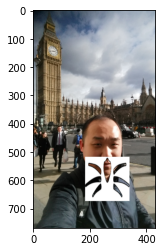

In [144]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

###

# 5. 퇴고

이번 exploration은 어려운것이 없었으나 최종 결과물에 오류가 있었다. 수염 이미지 파일이 손상된 것도 아닌데 적용하면 다른 이미지가 나왔다. 이미지파일을 manipulate하는 것은 명령어는 다소 복잡해서 햇깔렸지만 어려운것은 없었다. 또한 고개를 약간 틀고 찍은 사진이라 얼굴방향이 카메라 렌즈와 정면이 아니라서 bounded box가 파일상에서 오른쪽으로 여백이 생긴것으로 생각된다. 이를 제거하기 위해 몇가지 시도를 해밨지만 실패하였다. 